<a href="https://colab.research.google.com/github/Ankit2058/Image-classification/blob/main/Image_input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#If you are here after the two revsion session before this then this one is too easy to digest.
#Before we worked with numbers. Our input was a number, our output was a number, now its not just one number but matrices of numbers representing something meaningful as image.
#And there is no rigid function to map from input image to an output image; which inturn is an reason we use neural network in first place, if you want to feel anything about nn then feel flxibility, its so so flexible that it can model almost any complex mapping.
#An image even of a statue is different in its representation in numbers, as brightness and all other image parameters change due to reasons such as lighting,camera quality......
#And this complexity of imaage representation makes our problem complex cause two matrix with almost different values can be representing same thing.
#(Reseach Kink)(original idea)I think we must take this status of image representation just as an status which may even be changed, rather than taking it as an rigid fact. We should not be obssessed about the matrixes of numbers representing images,done so for the purpose of better recognition by human, we must keep exploring other means of representation better suited for the application
#Now lets get into this session
#lets say we hit a problem
#we have a photo gallary with photos of different item
#we want our machine learning algorithm distinct one item from another
#first we need to work with images for that purpose

In [2]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch import nn

In [3]:
#for this project i am not using this code snippet
from google.colab import drive
drive.mount('/content/drive')
#if you don't explicitly mount your Google Drive and set the root path to a location within it, the data is downloaded to the local file system of the Colab environment itself. This environment is temporary and gets reset once the Colab session ends

MessageError: Error: credential propagation was unsuccessful

In [4]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 18491133.97it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 310201.45it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5570385.48it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5261276.07it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [5]:
#While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.
#DataLoader is an iterable that abstracts this complexity for us in an easy API.
from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Label: 2


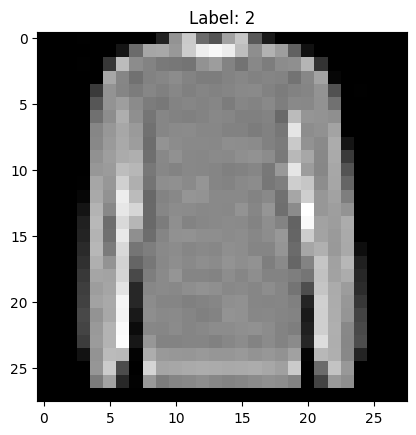

In [6]:
import matplotlib.pyplot as plt
#we are defining plotting funtion to ease our process of looking at the data
def plotting(data):

# Get the first item in the training data
  image, label = data

# Print the label
  print(f"Label: {label}")

# Plot the image
  plt.imshow(image.squeeze(),cmap='gray') #we squeeze the image to reduce its dimension to 2D for the purpose of plotting.
#The third dimension was used to index the image and it dosent hold any meaning for image representation so we squeeze it
# cmap defines color mapping, checkout these options for further clarity 1)gray 2)viridis(default) 3)plasma 4)inferno 5)magma ......and many more
  plt.title(f"Label: {label}")
  plt.show()

#lets test our funtion
plotting(training_data[45])

In [7]:
print(f"we have {len(training_data)} data for training and {len(test_data)} for testing")
#we have a huge dataset and we cant inset it directly into the

we have 60000 data for training and 10000 for testing


In [ ]:
#now we have bunch of images and we need some mechanism in between to distingush the images from one particular class to another.first lets list out all the labels


In [8]:
#so here is the mapped out class with its original name
label_map = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

In [9]:
#whenever you are curious about data type just type this code
type(label_map)

dict

In [10]:
#heres how we are using it
_,label=training_data[0]
print(f"Label: {label} ({label_map[label]})")

Label: 9 (Ankle boot)


In [11]:
#now lets get into the job of Taking the input data and finding out the insights inside the data that will help us in its classification
#let us first check out the input
print(f"Shape of training data: {training_data.data.size()}")
#.data is the attribute of the class torchvision.datasets.FashionMNIST to which training_data is instantiated to
#.data is that particular attribute which holds the data(image) in the form of tensors

Shape of training data: torch.Size([60000, 28, 28])


In [12]:
#lets see what one particular data looks like
image,_=training_data[89]
print(image)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
#so its an matrics of numbers.
#now its upto us to apply thousands of logic to dictate weather its a shirt or a boot but for several reasons which description in depth demands a seperate dedicated explanation so, lets stick with neural networks for now
#For basic understanding take it as a model which is able to pick nuance of pattern all thanks to its deeply connected heavy circuitry(neural network)
#I will use nn as an short form for neural network

In [13]:
#Working with nn we first need to define or import the model we will be training upon
#lets just define it!
class neural_network(torch.nn.Module):
  #we define the skeleton of our model using class and instante an model as an object, here you will find _init_(constructor) which instanciate every model with attributes flatten and linear_relu_stack that hold the object of the instantiated class
  def __init__(self):
    super(neural_network,self).__init__()
    self.flatten=torch.nn.Flatten() #self.flatten is instanciated from torch.nn.Flatten
    #self is used to bring the defined attribute,function out of the  _init_ funtion scope
    #Anything defined with "self"prefix has its scope across the class
    self.linear_relu_stack=torch.nn.Sequential(
        nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10)
    )
    #Then we defin a forward funtion to propagate input data throught the model
  def forward(self,x):
     x = self.flatten(x)
     logits = self.linear_relu_stack(x)
     return logits


In [14]:
#now lets define a model as an instane of the neural_network class
model=neural_network();
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.0017, -0.0242,  0.0147,  ...,  0.0342,  0.0340,  0.0092],
        [ 0.0199, -0.0115, -0.0188,  ...,  0.0310, -0.0246, -0.0037],
        [ 0.0180, -0.0333,  0.0336,  ...,  0.0287, -0.0055,  0.0165],
        ...,
        [ 0.0006,  0.0066, -0.0169,  ...,  0.0174, -0.0226,  0.0151],
        [-0.0314,  0.0112,  0.0337,  ...,  0.0149, -0.0143,  0.0186],
        [ 0.0215, -0.0241,  0.0127,  ..., -0.0017, -0.0103,  0.0304]],
       requires_grad=True), Parameter containing:
tensor([-1.4263e-02,  1.5025e-03, -3.1679e-02,  2.3741e-02, -2.5350e-02,
         2.2559e-02,  1.2282e-03, -6.9856e-04, -3.2783e-02, -1.7880e-02,
         1.5912e-02, -8.1280e-03, -2.1156e-02, -2.1216e-02,  1.8452e-02,
         2.8250e-02,  3.3135e-02, -2.9140e-02,  7.3974e-04,  2.6846e-02,
         1.8081e-02, -1.0968e-02, -1.0221e-02,  1.8870e-02,  3.0244e-02,
        -3.3476e-02,  5.4226e-03,  2.8860e-02, -1.3496e-02,  2.0198e-02,
        -2.0093e-02,  1.8608e-03,  2.1285e-02,  1.4070e

In [15]:
#so till now, we have our model defined(an abstract skelaton that gives some output)
#lets give it an image input and checkout the result
test_image,_=training_data[89]
print(test_image.size())
result = model(test_image)
print(result)
#now heres a part about all of these data analysis stuffs. We neither give the data in the format that is understandable to us nor we get the dat in the format that is understood to us.
#the below result showing the matrices of 10 numbers holds no significant meaning at this moment. Now here the thing, we use the sword of loss and optimization and tell the model to spit out the result our expectation. We might want to see the 10th number to be one and everyother number to be zero while the imput is 10th image

torch.Size([1, 28, 28])
tensor([[-0.0048, -0.0383,  0.0339,  0.0239,  0.0302, -0.0436,  0.0153, -0.0297,
          0.0420,  0.0173]], grad_fn=<AddmmBackward0>)


In [16]:
#Now we need to build up loss fucntion that will judge our result and  and optimizer that will take our bad model in the eye of loss function to good model
#There are many optimizers out there,you can recall back to notes for the purpose of revision.
#for now we are using stochastic gradient decent
#its takes model parameter and learning_rate and updates the parameter in the rate as described by learning_rate
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [17]:
#now we have a model to generate output
#loss function to judge the output
#optimizer to change the model parameter to reduce loss in the output
#now we need to train the model
#lets start with two important hyperparmeters
#1)epoch:number of times we will change the model parameter
#2)batch_size: number of images that our model will consider berfore it optimizes the model parameter
epoch=10
batch_size=64

In [20]:
print(len(train_dataloader.dataset))

60000


In [29]:
#so we have build up all of our arsenal required for the final job of training our small model and test how well it did its job
#now lets train our model
#here we define the tarining_looop which takes dataloader which feeds data in batches, training_loop further takes model itself, loss function and optimizer.
#the sole purpose here is to calculate the loss using loss_fn on the ouput of the model when inputed with dataloader input and optimize model parameter using the optimizer specified in the argument
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
      #In this loop batch hold the batch value given by dataloader and X and y values yet again from dataloader
      #X dosent hold a single image rather it holds batch of images
      #We loop through every batch of image
      #And perform following computation, every batch
        # Compute prediction and loss
        pred = model(X)
        #Output of batch of images
        loss = loss_fn(pred, y)
        #single loss value if computed from the batch of output

        # Backpropagation
        loss.backward()
        #we propgate the loss back to each layers for gradient computation
        optimizer.step()
        #Then we optimize the model parameter
        optimizer.zero_grad()
        #Everytime we backpropagate, gradients value gets stored for optimization purposes, but if not set to zero the gradient of next batch will be accumulated
        #now if you want to optimize the model after every 5 batches of data then do zero-grad after every 5 batches, till then the gradient of each of those 5 batches will be accumulated
        #but for now we want to optimize the model after each batch so we need to zero-grad after every batch

        if batch % 100 == 0:
            print(batch)
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


#extra info(Mechanism of model training detail): We first do forward pass which is to pass imput throught the model and during forward pass vlues for gradeint computation are stored for each neuron, then we do the backward pass which is to first claculate the loss and then propagate it back and using chain rule gradient is computed for each model parameter(change in output w.r.t change in model parameter) then we optimize the  model parameter based on gradeint now we dont want the next gradient to accumulate on existing gradient cause we are optimizing eveytime so we zero-grad or set gradients values to zero

In [30]:
#now all we need to do is train and test the model for the number of times(epochs) we want
epochs = 1
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("DONE!")

Epoch 1
-------------------------------
0
loss: 1.867551  [   64/60000]
100
loss: 1.892889  [ 6464/60000]
200
loss: 1.853470  [12864/60000]
300
loss: 1.754652  [19264/60000]
400
loss: 1.783724  [25664/60000]
500
loss: 1.729391  [32064/60000]
600
loss: 1.585812  [38464/60000]
700
loss: 1.696269  [44864/60000]
800
loss: 1.666874  [51264/60000]
900
loss: 1.548176  [57664/60000]
Test Error: 
 Accuracy: 60.9%, Avg loss: 1.542582 

Done!


predicted value of the image is tensor([9])
Label: 9


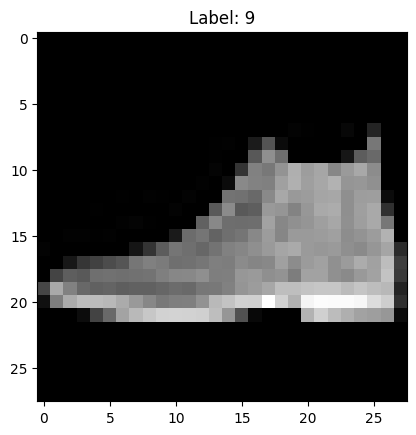

predicted value of the image is tensor([2])
Label: 2


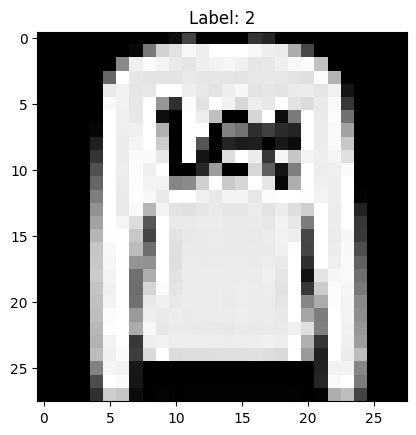

predicted value of the image is tensor([1])
Label: 1


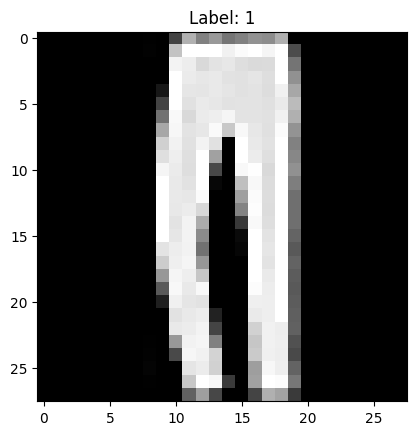

predicted value of the image is tensor([1])
Label: 1


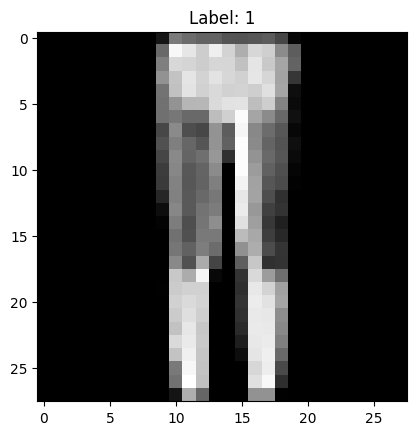

predicted value of the image is tensor([2])
Label: 6


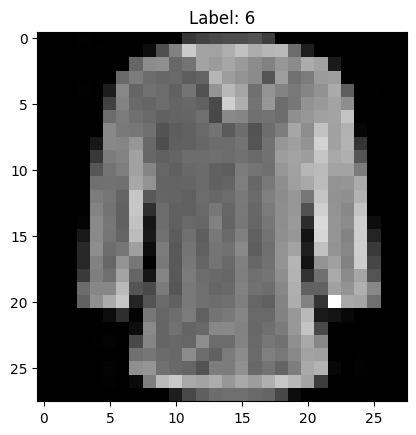

predicted value of the image is tensor([1])
Label: 1


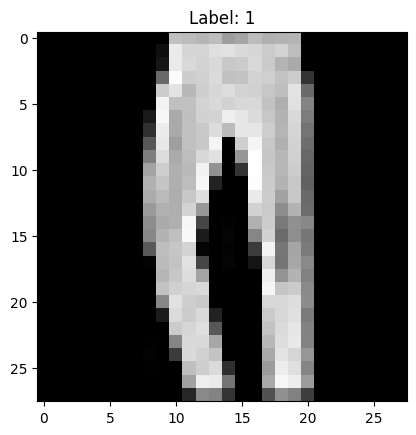

predicted value of the image is tensor([4])
Label: 4


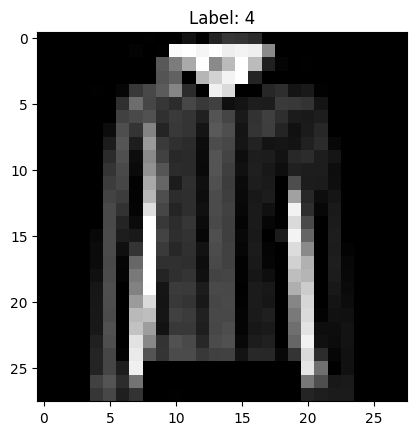

predicted value of the image is tensor([4])
Label: 6


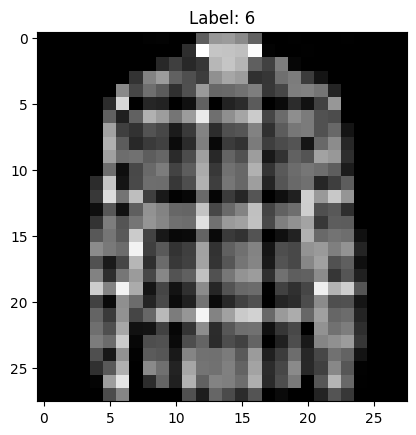

predicted value of the image is tensor([7])
Label: 5


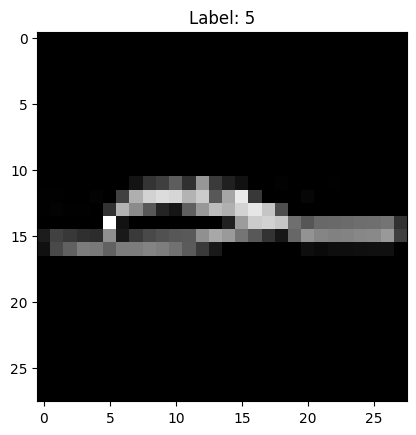

predicted value of the image is tensor([7])
Label: 7


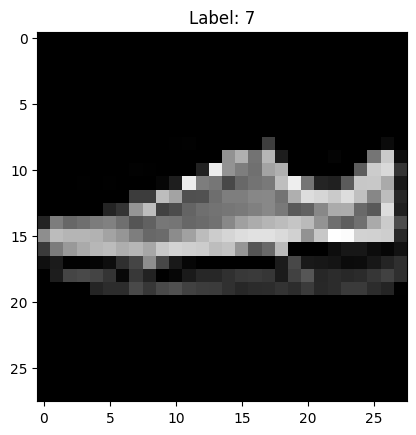

In [31]:
#here i am checking if the predicted class matches with the actual class
for i in range(10):
  testing,_=test_data[i]
  print(f"predicted value of the image is {model(testing).argmax(1)}") #this prints the actual class of the test data
  #how it works: model(training) gives the matrices of ouput, argmax(1) gives the index of the value within the output with the highest value(highest value in the output denote the predicted class)
  plotting(test_data[i])
  #plotting function shows the image in the data along with label

